### Support Vector Regression (SVR) using linear and non-linear kernels¶
The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression. Just like in support vector classification, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.

We will generate 1D regression using linear, polynomial and RBF kernels. Let us firstly import the required libraries and upload the natural gas dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

print(__doc__)

import numpy as np
from sklearn.svm import SVR

Automatically created module for IPython interactive environment


In [2]:
# Read the data set
df=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,WSTAT,GasPriceStatus,GPSAT,color
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,1,HIGH,1,1
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,1,HIGH,1,1
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,1,HIGH,1,1
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,1,HIGH,1,1
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH,1,1


### Regressing Gas Price against Average Coal Price
Let us convert the features: GasPrice and Weather status to numpy arrays

In [3]:
# Use only one feature
X = df.AveCoalPrice[:, np.newaxis]
X_temp = X[:,]
y = df.GasPrice

We will now fit regression models and then compare the results in a plot

In [4]:
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.5)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

C:\Users\Angus\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Angus\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Angus\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


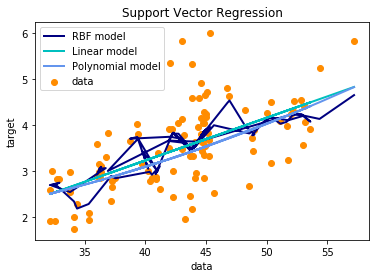

In [5]:
# plot the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X_temp, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Estimating score for the natural gas data using SVR
We will first of all import all the required libraries.

In [6]:
from sklearn.svm import SVR
import numpy as np


We will now define the dependent variable (Gas Price) and we will assign it to the variable y.

In [7]:
y = df.GasPrice.values

Also define X as an array of all the independent variables: 

In [8]:
#let dfind be the pandas dataframe comprising the key independent variables
dfind = df[['AveCoalPrice', 'OilPrice', 'GrossGasProd', 'TotGasCons']]

In [9]:
# Assign X to the numpy array built from dfind
# Use only one feature
X = dfind.values

We will now carry out automatic splitting of the data into training and test samples. 
Import the train_test_split library

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

C:\Users\Angus\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y)

Define the classification factor, where the penalty parameter C of the error term = 1 and Epsilon = 0.2. Epsilon in the epsilon-SVR model specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

In [12]:
clf = SVR(C=1.0, epsilon=0.2)

We now fit the training data

In [13]:
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

The default kernel type used in the algorithm is ‘rbf’. In machine learning, the (Gaussian) radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification

We now estimate the decision function dec.

In [14]:
dec = clf.decision_function([[0,1,2,3]])

C:\Users\Angus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
dec.shape[1]

1

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in members support_vectors_, support_ and n_support. Let us now determine these members:

In [16]:
from sklearn import svm

In [17]:
 # get support vectors
clf.support_vectors_

array([[   45.19 ,    95.77 ,  2385.386,  1742.917],
       [   35.32 ,    37.19 ,  2814.383,  2590.888],
       [   46.76 ,    75.34 ,  2138.77 ,  1649.515],
       [   43.17 ,    84.4  ,  2735.719,  1912.81 ],
       [   36.21 ,    48.48 ,  2678.402,  2314.81 ],
       [   43.662,    95.31 ,  2269.907,  2567.155],
       [   45.086,    94.62 ,  2580.019,  3204.129],
       [   48.24 ,    76.6  ,  2235.038,  1878.926],
       [   40.54 ,    59.27 ,  2791.236,  1863.454],
       [   44.86 ,    81.2  ,  2276.546,  2142.925],
       [   39.4  ,    69.64 ,  2140.519,  1527.833],
       [   36.01 ,    49.33 ,  2771.238,  2504.056],
       [   50.33 ,    98.56 ,  2543.747,  2541.878],
       [   37.23 ,    42.87 ,  2741.97 ,  2061.224],
       [   32.26 ,    45.18 ,  2639.906,  1949.618],
       [   32.71 ,    44.72 ,  2742.05 ,  2213.548],
       [   50.04 ,    89.15 ,  2400.418,  2714.054],
       [   44.39 ,   102.18 ,  2633.253,  1810.222],
       [   40.842,    47.82 ,  2823.658,  2592

In [18]:
# get indices of support vectors
clf.support_ 

array([ 0,  1,  2,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57,
       58, 59, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77])

In [19]:
# get number of support vectors for each class
clf.n_support_ 

array([        16, 1072693248])

In [20]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

We will now get all the parameters of the regression fit

In [21]:
ytrainparam = clf.fit(x_train, y_train).get_params([])
ytrainparam

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

We will now predict the training data and also use the clf fit for the training data to predict the test data 

In [22]:
y_rbf = clf.fit(x_train, y_train).predict(x_test)

Let us calculate the score for the test data

In [25]:
y_score = clf.fit(x_train, y_train).score(x_test, y_test)
y_score

-0.050998533867189222

We also determine the score for all the data

In [26]:
yall_score = clf.fit(x_train, y_train).score(X, y)
yall_score

0.63634401052718848

In [27]:
svr_lin = SVR(kernel='linear', C=1.0)


In [28]:
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)

In [30]:
ylin_score = svr_lin.fit(x_train, y_train).score(x_test, y_test)

In [31]:
 print (ylin_score)

-3.0684619752


### Oil Price vs Gas Price
X = df.OilPrice

In [34]:
X = df.OilPrice

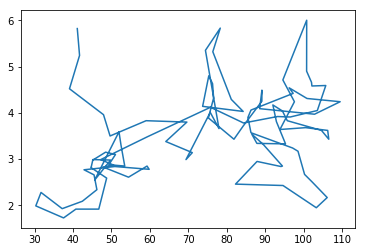

In [35]:
plt.plot(X,y, label='True data')

In [48]:
x = df.OilPrice[:, np.newaxis]
x_temp = x[:,]

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

In [50]:
# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x_temp, y)

In [51]:
from sklearn import datasets, linear_model

In [52]:
model = linear_model.LinearRegression()

In [53]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
svr = SVR(kernel='linear')
lm = linear_model.LinearRegression()
svr.fit(x_train.reshape(-1,1),y_train.flatten())
lm.fit(x_train.reshape(-1,1), y_train.flatten())


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
pred_SVR = svr.predict(x_test.reshape(-1,1))
pred_lm = lm.predict(x_test.reshape(-1,1))

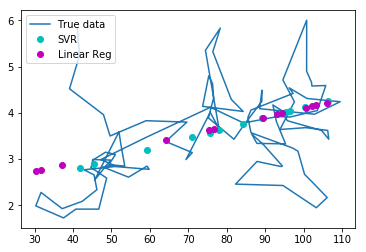

In [59]:
plt.plot(X,y, label='True data')
plt.plot(x_test[::2], pred_SVR[::2], 'co', label='SVR')
plt.plot(x_test[1::2], pred_lm[1::2], 'mo', label='Linear Reg')
plt.legend(loc='upper left');